In [1]:
from __future__ import absolute_import, division, print_function

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

sys.path.append("../gym-sepsis/")
import gym_sepsis
from gym_sepsis.envs.sepsis_env import SepsisEnvVariational


In [2]:
data = np.load("../processed_data.npz")
df = pd.read_csv("/Users/amir/Downloads/test_state_action_reward_df.csv")

In [3]:
sepsis_env = SepsisEnvVariational()

Instructions for updating:
Colocations handled automatically by placer.
Tensor("z/random_normal:0", shape=(?, 30), dtype=float32)
Tensor("z_1/random_normal:0", shape=(?, 30), dtype=float32)
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.


In [4]:
x = data['x_test']
y = data['y_test']

In [5]:
columns = ['ALBUMIN', 'ANION GAP', 'BANDS', 'BICARBONATE',
       'BILIRUBIN', 'BUN', 'CHLORIDE', 'CREATININE', 'DiasBP', 'Glucose',
       'GLUCOSE', 'HeartRate', 'HEMATOCRIT', 'HEMOGLOBIN', 'INR', 'LACTATE',
       'MeanBP', 'PaCO2', 'PLATELET', 'POTASSIUM', 'PT', 'PTT', 'RespRate',
       'SODIUM', 'SpO2', 'SysBP', 'TempC', 'WBC', 'age', 'is_male',
       'race_white', 'race_black', 'race_hispanic', 'race_other', 'height',
       'weight', 'vent', 'sofa', 'lods', 'sirs', 'qsofa', 'qsofa_sysbp_score',
       'qsofa_gcs_score', 'qsofa_resprate_score', 'elixhauser_hospital',
       'blood_culture_positive', 'action', 'state_idx']


In [6]:
df.iloc[6:23]

,subject_id,hadm_id,icustay_id,interval_start_time,interval_end_time,ALBUMIN,ANION GAP,BANDS,BICARBONATE,BILIRUBIN,...,qsofa_sysbp_score,qsofa_gcs_score,qsofa_resprate_score,elixhauser_hospital,blood_culture_positive,discrete_action,hospital_expire_flag,reward,row_id,row_id_next
6,145,198161,226841,2144-03-29T19:00:00Z,2144-03-29T23:00:00Z,-0.058925,0.023291,-0.297663,-0.600421,-0.293952,...,0.540022,1.727312,0.390655,1.465021,-0.684186,20,0,0,6.0,7.0
7,145,198161,226841,2144-03-29T23:00:00Z,2144-03-30T03:00:00Z,0.083825,-0.721072,-0.297663,-0.386614,-0.248334,...,0.540022,1.727312,0.390655,1.465021,-0.684186,15,0,0,7.0,8.0
8,145,198161,226841,2144-03-30T03:00:00Z,2144-03-30T07:00:00Z,0.083825,-0.721072,-0.297663,-0.386614,-0.248334,...,0.540022,1.727312,0.390655,1.465021,-0.684186,15,0,0,8.0,9.0
9,145,198161,226841,2144-03-30T07:00:00Z,2144-03-30T11:00:00Z,0.083825,-0.721072,-0.297663,-0.386614,-0.248334,...,0.540022,1.727312,0.390655,1.465021,-0.684186,10,0,0,9.0,10.0
10,145,198161,226841,2144-03-30T11:00:00Z,2144-03-30T15:00:00Z,0.083825,-0.721072,-0.297663,-0.386614,-0.248334,...,0.540022,1.727312,0.390655,1.465021,-0.684186,0,0,0,10.0,11.0
11,145,198161,226841,2144-03-30T15:00:00Z,2144-03-30T19:00:00Z,0.083825,-0.721072,-0.297663,-1.669454,-0.248334,...,0.540022,1.727312,0.390655,1.465021,-0.684186,0,0,0,11.0,12.0
12,145,198161,226841,2144-03-30T19:00:00Z,2144-03-30T23:00:00Z,0.083825,-0.472951,-0.297663,-1.669454,-0.248334,...,0.540022,1.727312,0.390655,1.465021,-0.684186,10,0,0,12.0,13.0
13,145,198161,226841,2144-03-30T23:00:00Z,2144-03-31T03:00:00Z,0.083825,-0.472951,-0.297663,-1.669454,-0.248334,...,0.540022,1.727312,0.390655,1.465021,-0.684186,20,0,0,13.0,14.0
14,145,198161,226841,2144-03-31T03:00:00Z,2144-03-31T07:00:00Z,0.083825,-0.969193,-0.297663,-1.028034,-0.248334,...,0.540022,1.727312,0.390655,1.465021,-0.684186,15,0,0,14.0,15.0
15,145,198161,226841,2144-03-31T07:00:00Z,2144-03-31T11:00:00Z,0.083825,-0.969193,-0.297663,-1.028034,-0.248334,...,0.540022,1.727312,0.390655,1.465021,-0.684186,20,0,0,15.0,16.0


In [7]:
# sns.set(style="white")
from matplotlib.pyplot import figure
    

def plot(column, start, end, sepsis_env):
    simulated_states = np.zeros(shape=(end - start, x[start].shape[0] - 1))
    simulated_states[0] = np.squeeze(sepsis_env.reset(starting_state=x[start][:-1]))
    doctor_actions = x[start:end][:,46]
    for i in range(1, end - start):
        simulated_states[i, :] = np.squeeze(sepsis_env.step(doctor_actions[i])[0])
        
    plt.plot(np.array(x[start:end, columns.index(column)]), label="truth", scaley=False)
    plt.plot(np.array(simulated_states[:,columns.index(column)]), label="predicted", scaley=False)
    plt.ylim(-2, 2)
    plt.legend(["truth", "predicted"])
    plt.title(column)

In [8]:
columns.index("age")

28

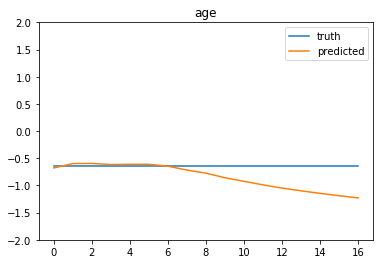

In [9]:
plot("age" ,6, 23, sepsis_env)

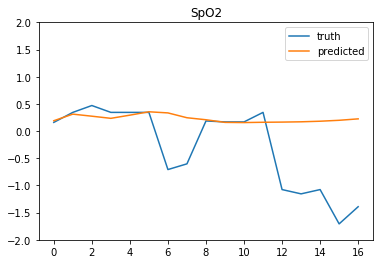

In [10]:
plot("SpO2" ,6, 23, sepsis_env)

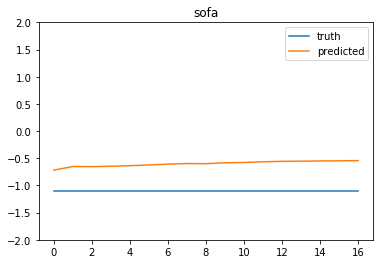

In [11]:
plot("sofa" ,6, 23, sepsis_env)

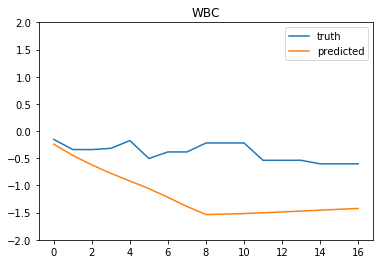

In [12]:
plot("WBC" ,6, 23, sepsis_env)

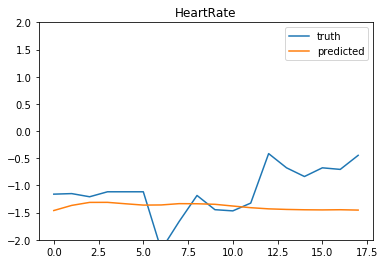

In [13]:
plot("HeartRate" ,6, 24, sepsis_env)